# Investigate a Dataset Medical Appointment No Show 

## Table of contents : 

*  [Introduction](#Introduction) 

* [Data Wrangling](#Data-Wrangling)

* [Exploratory Data Analysis](#Exploratory-Data-Analysis)

* [Conclusion](#Conclusion)


# Introduction <a id="#Introduction"></a> 

why the patients miss their scheduled appointment?

The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

Having this data set to infestigate the dataset towards a meaningful insights regrading the attending isuue of each medical appointment.

There are a few important quetions that would help through addressing this issue.

## Questions :

1. What is the proportion of the appoinments that the patients show up vs. no-show? 

2. Is the age of the patients relate to the propbabilty of No Show?

3. Do most of the patient that have a scholarship are more likely to show up?

4. Do most of the patient that didn’t show to their appointments didn’t receives a SMS message?


## Load the pacakages and the dataset 

In [51]:
import pandas as pd # import the needed pacakages 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

df = pd.read_csv('C:\\Users\\Afnan\\.jupyter\\Noshow_appointment.csv') # load the dataset 

# Data Wrangling <a id="Data-Wrangling"></a>

In this section, I am trying to wrangle the data by the data type, missing values, repetitive rows to answer my qusetions effectively. 

In [52]:
df.info() # seems that there is no missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [53]:
df.head() # the data set is in a good structure 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
sum(df.duplicated()) # there is no dupilcated rows 

0

In [55]:
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As, shown from the table there is (-1) Age which is a uncorrect information, but before we need to know how much of these exist
then we drop the rows.    

In [56]:
df[df['Age'] == -1 ] # there is only one row with -1 age 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [57]:
df.drop([99832], axis= 0, inplace = True) #drop the row with -1 age value 

As we can see, there is no problem with the sturcture of the dataset.Also, by now there is no issues with the data. 

# Exploratory Data Analysis <a id="Exploratory-Data-Analysis"></a>

First, I would create a needed function to avoid repetitive code 

In [88]:
def bar_chart(x, y, col, title, xlabel , ylabel):
    plt.bar(x,y,alpha=0.7,color=col);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    
    return plt.show();

### 1. What is the proportion of the appoinments that the patients show up vs. no-show? 

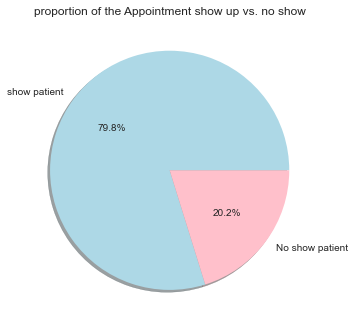

In [66]:
df_no = df.query('`No-show` == "Yes"') # Dataset copy for the no-show
df_show = df.query('`No-show` == "No"') # Dataset copy for the show

show_part = df_show.groupby('No-show')['AppointmentID'].count().sum()
no_show_part = df_no.groupby('No-show')['AppointmentID'].count().sum()
total = df.groupby('No-show')['AppointmentID'].count().sum()
 
show_prop =  show_part / total # show proportion
noshow_prop = no_show_part / total # no show proportion

labels = ['show patient' , 'No show patient']
colors = ['lightblue','pink']

plt.pie([show_prop, noshow_prop], labels= labels, colors= colors, shadow=True, autopct='%1.1f%%');
plt.title("proportion of the Appointment show up vs. no show");

As it shown from the pie chart above that 20.2% of all the appointments that the patient didnt show up. 


### 2- Is the age of the patients relate to the propbabilty of No Show?


In [69]:
bin_edges = [0,10,20 ,30 ,40 ,50 ,60 ,70 ,80 ,90 ,100]
age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90+']

df['Age_group']= pd.cut(df['Age'], bin_edges, labels=age_group) 

width = 0.30  # the width of the bar

an_sum = df_no.groupby('Age_group')['AppointmentID'].count().sum()
as_sum = df_show.groupby('Age_group')['AppointmentID'].count().sum()

behalf_non = df_no.groupby('Age_group')['AppointmentID'].count()
behalf_shown = df_show.groupby('Age_group')['AppointmentID'].count()

chart_non = behalf_non / an_sum
chart_shown = behalf_shown / as_sum

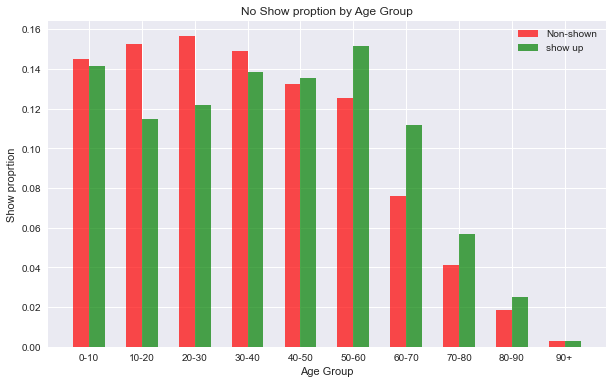

In [70]:
ind = np.arange(len(chart_non))  # the x locations for the groups

plt.figure(figsize=(10,6))

first_non = plt.bar(ind, chart_non, width, color='r', alpha=.7, label='Non-shown')
sec_shown = plt.bar(ind + width, chart_shown, width, color='g', alpha=.7, label='show up')


plt.title('No Show proption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Show proprtion')
loc = ind + width / 2  # xtick location
plt.xticks(loc,age_group)

plt.legend();
plt.show()

The bar chart above shows the show and non-show proportion for each age group.Some of the ages groups more likely to not show more than other ages groups.



### 3- Do most of the patient that have a scholarship are more likely to show up?


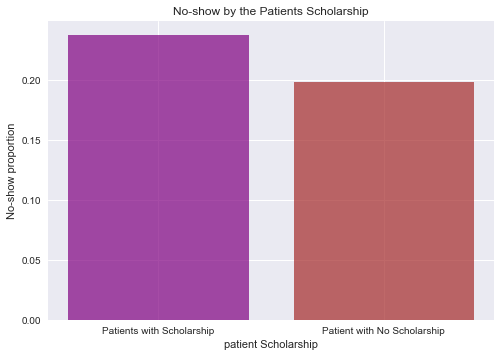

In [86]:
## Scholarship
total = df_no['AppointmentID'].count() # total number of appointment with a no-show state
total_s = df.query('Scholarship == 1')['PatientId'].count()
total_no = df.query('Scholarship == 0')['PatientId'].count() 

app_sch = df_no.query('Scholarship == 1')['PatientId'].count() # number of appointment that the patients have scholorship  
app_non = df_no.query('Scholarship == 0')['PatientId'].count()  # number of appointment that the patients dont have scholorship 

prop_sch = app_sch / total_s
prop_non = app_non / total_no


xis = ['Patients with Scholarship','Patient with No Scholarship']
S_colors = ['purple','brown']

bar_chart(xis, [prop_sch,prop_non], S_colors, 'No-show by the Patients Scholarship', 'patient Scholarship', "No-show proportion");

As it shown from the bar chart that the patients with Scholarship are more likely to not show in the appoinment more than the non-scholarship patients but,also there is no big difference between them.



### 4-	Do most of the patient that didn’t show to their appointments didn’t receives a SMS message?


In [72]:
r_sms = df_no.query('SMS_received == 1')['AppointmentID'].count() # number of appointments that the patient recieved a SMS 
n_sms = df_no.query('SMS_received == 0')['AppointmentID'].count() # number of appointments that the patient didnt recieved a SMS

In [74]:
total = df_no['AppointmentID'].count() # total number of appointment 

prop_rec = r_sms/ total 
prop_not = n_sms/ total

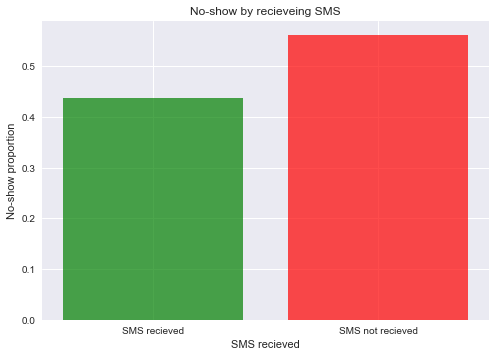

In [87]:
x_val = ['SMS recieved','SMS not recieved']
colors = ['green','r']

bar_chart(x_val,[prop_rec,prop_not], colors,'No-show by recieveing SMS', 'SMS recieved', "No-show proportion");

As the bar Graph shows that the patients who didnt recieves a SMS are more proportion of not showing to the appointment.

# Conclusion <a id="Conclusion"></a>

At the end we can say that there could be several of factors that could influnce the patient for attending their appointment: 
 1. The age of the patient 
 2. The scholarship of a patient 
 3. The SMS message 
 
And probably there are more factores.

# limitation 

1. The Dataset provides more Categorial data than nomerical data.
2. There was a inconsistent data found of a negative age value.

## Resources 

1. [Markdown guide](https://www.markdownguide.org/basic-syntax/)
2. [Matplotlib style](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles)